### Imports

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import os
from pathlib import Path

## Leitura dos ficheiros

In [2]:
# Guardar todos os outputs numa única pasta
output_folder = Path.cwd() / "output"
output_folder.mkdir(parents=True, exist_ok=True)

# Exemplo: mapa.save(output_folder / 'mapa_de_calor_portugal_Danielle.html')

In [3]:
p = Path.cwd()
data_folder = p.parent.parent / "data"
shape_folder = p.parent.parent / "shape"
file_path = data_folder / "12-continuidade-de-servico-indicadores-gerais-de-continuidade-de-servico.csv"

quebras = pd.read_csv(file_path, sep = ";")

In [4]:
quebras.drop(["ligacao_auxiliar_mapa"], axis=1, inplace=True)
quebras

,ANO,NUTS_III,CODIGO_CONCELHO,Concelho,zona rqs,saifi at num,saidi at min,maifi at num,tiepi mt min,end mt mwh,saifi mt num,saidi mt min,maifi mt num,saifi bt num,saidi bt min
0,2022,Algarve,806,Lagoa,Concelho,0.0,0.0,0.0,40.034108,10.959622,1.229384,43.942583,4.251137,1.225017,68.442659
1,2022,Algarve,812,São Brás de Alportel,Concelho,0.0,0.0,0.0,101.574416,6.462113,1.553845,90.740317,4.073504,1.887307,128.437961
2,2022,Alentejo Litoral,1509,Santiago do Cacém,Zona C,0.0,0.0,1.0,44.594565,6.901322,2.982636,47.340065,17.806747,4.292748,93.853919
3,2022,Alentejo Litoral,1509,Santiago do Cacém,Concelho,0.0,0.0,1.0,55.473583,13.033786,3.141415,53.461679,15.149788,3.778155,81.586030
4,2022,Algarve,801,Albufeira,Zona C,0.0,0.0,0.0,43.909497,13.423954,1.416022,43.208029,7.362719,1.535477,50.752629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,2014,Algarve,805,Faro,Zona C,0.0,0.0,0.0,87.048700,19.824600,1.370700,90.673000,5.851090,1.343140,154.812000
10004,2014,Região de Aveiro,110,Ílhavo,Zona B,0.0,0.0,0.0,45.352100,10.689900,1.213120,44.985400,9.021750,0.902799,39.824000
10005,2014,Médio Tejo,509,Sertã,Zona A,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10006,2014,Lezíria do Tejo,1415,Salvaterra de Magos,Zona C,0.0,0.0,0.0,55.059300,2.200490,0.853415,46.646900,29.049600,0.365206,9.487440


## Gráficos

In [5]:
quebras.columns

Index(['ANO', 'NUTS_III', 'CODIGO_CONCELHO', 'Concelho', 'zona rqs',
       'saifi at num', 'saidi at min', 'maifi at num', 'tiepi mt min',
       'end mt mwh', 'saifi mt num', 'saidi mt min', 'maifi mt num',
       'saifi bt num', 'saidi bt min'],
      dtype='object')

In [6]:
grupo_zona = quebras.groupby(['ANO', 'zona rqs'])[['saifi at num', 'saidi at min', 'maifi at num', 'tiepi mt min',
                                                  'end mt mwh', 'saifi mt num', 'saidi mt min', 'maifi mt num', 
                                                  'saifi bt num', 'saidi bt min']].mean().reset_index()
zonasRemove = grupo_zona.loc[grupo_zona["zona rqs"]=="Concelho"]
grupo_zona = grupo_zona.drop(zonasRemove.index)
grupo_zona

,ANO,zona rqs,saifi at num,saidi at min,maifi at num,tiepi mt min,end mt mwh,saifi mt num,saidi mt min,maifi mt num,saifi bt num,saidi bt min
1,2014,Zona A,0.003597,0.021583,0.014388,2.805995,1.361952,0.094516,3.219612,0.396439,0.096221,3.676328
2,2014,Zona B,0.014388,1.719544,0.065048,26.732651,3.715854,0.773005,31.268806,5.174728,0.732961,29.246833
3,2014,Zona C,0.124760,11.854989,0.562890,96.264833,9.542070,2.234061,109.680786,18.850633,2.285546,115.278811
5,2015,Zona A,0.003597,0.495385,0.003597,3.889203,1.373978,0.091474,5.284403,0.288985,0.101702,4.621177
6,2015,Zona B,0.007194,0.449041,0.035671,26.951217,3.632782,0.739273,31.163022,4.172542,0.740151,30.264442
7,2015,Zona C,0.091427,7.923572,0.414329,81.955605,7.719334,2.074324,95.597649,14.838707,2.190470,100.238201
9,2016,Zona A,0.003597,0.373680,0.021583,3.391425,1.595101,0.117180,3.862839,0.327883,0.114207,4.002946
10,2016,Zona B,0.011990,0.692387,0.071942,25.051461,3.310889,0.736553,29.311117,4.200757,0.746149,31.008035
11,2016,Zona C,0.084053,32.008986,0.580456,77.642079,7.400919,2.142285,90.769386,15.176865,2.197497,94.063426
13,2017,Zona A,0.000000,0.000000,0.000000,2.745809,1.344731,0.093407,3.179603,0.238665,0.096770,3.434481


In [7]:
grupo_zona.columns

Index(['ANO', 'zona rqs', 'saifi at num', 'saidi at min', 'maifi at num',
       'tiepi mt min', 'end mt mwh', 'saifi mt num', 'saidi mt min',
       'maifi mt num', 'saifi bt num', 'saidi bt min'],
      dtype='object')

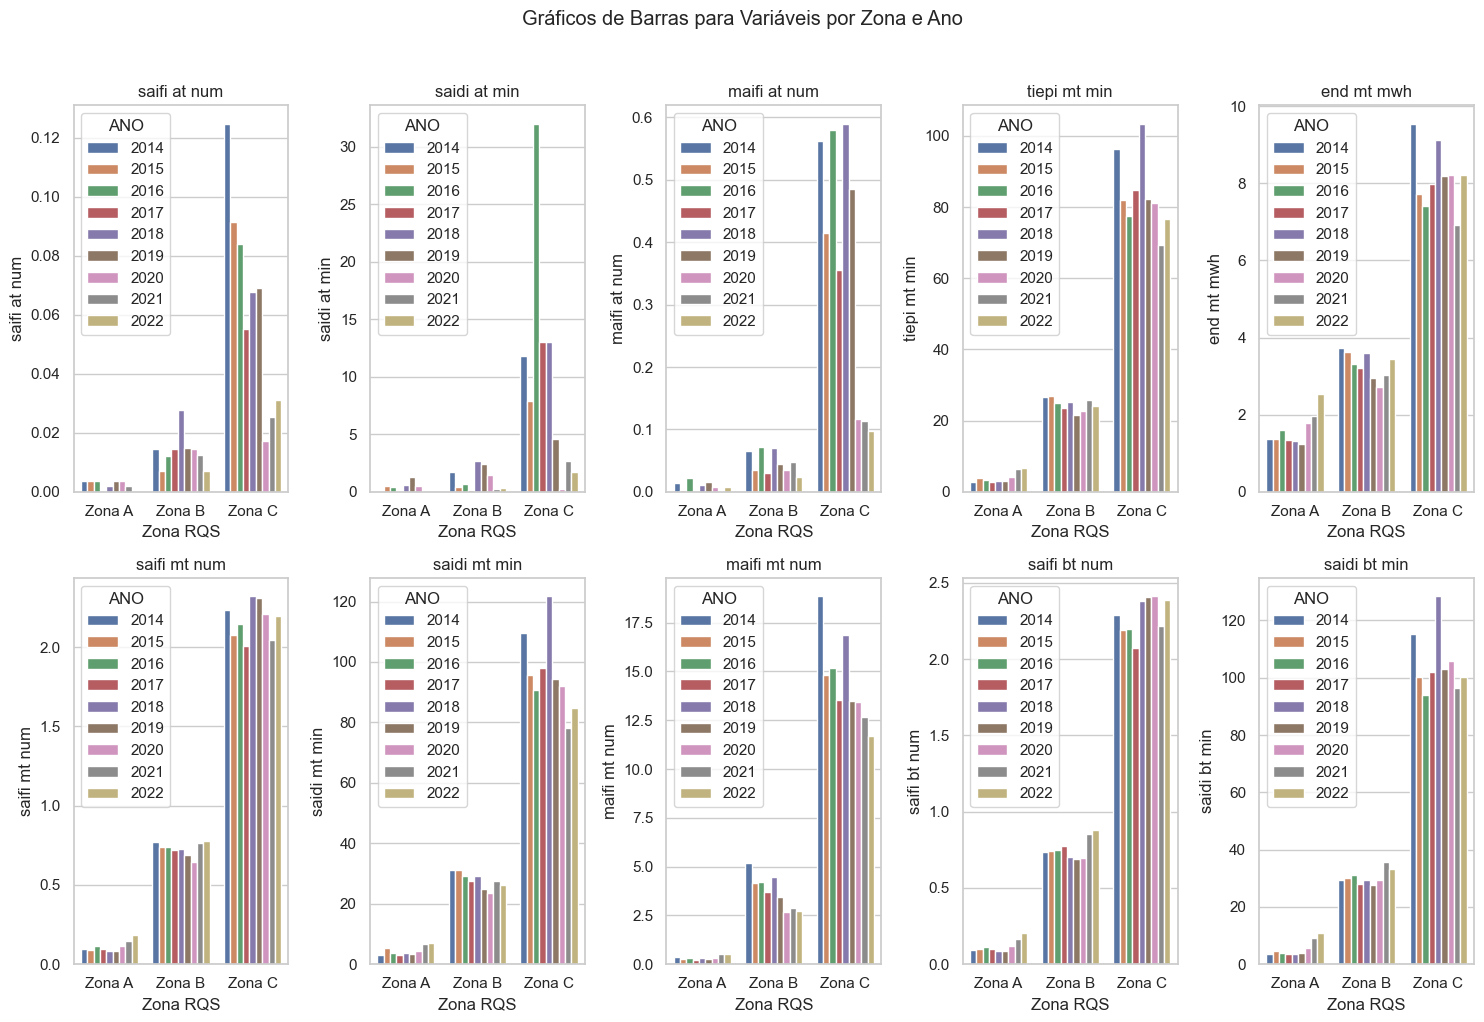

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'grupo_zona' seja o seu DataFrame agrupado
# Substitua 'seu_dataframe.csv' pelo caminho ou nome do seu arquivo, se aplicável
# Certifique-se de ter o seaborn e matplotlib instalados: pip install seaborn matplotlib

# Defina o número de subgráficos por linha
num_subplots_por_linha = 5

# Variáveis que você deseja incluir no gráfico
variaveis = ['saifi at num', 'saidi at min', 'maifi at num', 'tiepi mt min',
             'end mt mwh', 'saifi mt num', 'saidi mt min', 'maifi mt num', 
             'saifi bt num', 'saidi bt min']

# Calcule o número total de subgráficos necessários
num_subplots = len(variaveis)

# Calcule o número total de linhas necessárias
num_linhas = (num_subplots // num_subplots_por_linha) + (num_subplots % num_subplots_por_linha > 0)

# Crie subgráficos
fig, axs = plt.subplots(num_linhas, num_subplots_por_linha, figsize=(15, 5*num_linhas))
fig.suptitle('Gráficos de Barras para Variáveis por Zona e Ano', y=1.02)

# Loop para preencher os subgráficos
for i, variavel in enumerate(variaveis):
    linha = i // num_subplots_por_linha
    coluna = i % num_subplots_por_linha
    sns.barplot(data=grupo_zona, x='zona rqs', y=variavel, hue='ANO', ax=axs[linha, coluna])
    axs[linha, coluna].set_title(variavel)
    axs[linha, coluna].set_xlabel('Zona RQS')
    axs[linha, coluna].set_ylabel(variavel)

# Ajuste de layout
plt.tight_layout()
plt.show()


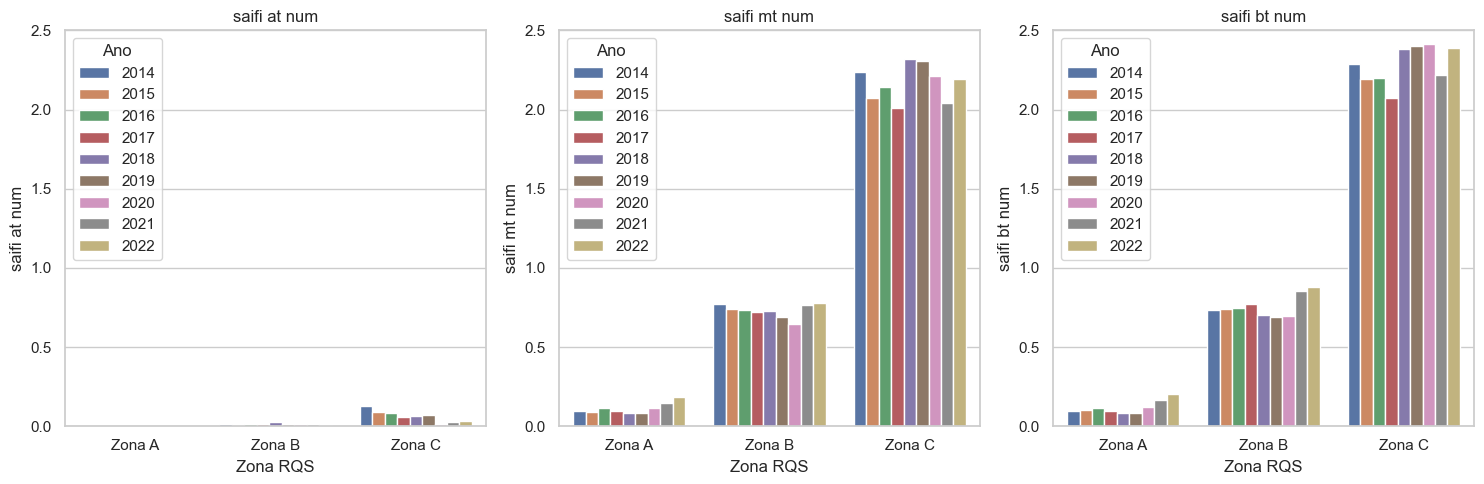

In [9]:
# Variáveis que você deseja incluir no gráfico
variaveis = ['saifi at num', 'saifi mt num', 'saifi bt num']

# Crie o gráfico
plt.figure(figsize=(15, 5))

# Loop para adicionar as barras para cada variável
for i, variavel in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=grupo_zona, x='zona rqs', y=variavel, hue='ANO')
    plt.title(variavel)
    plt.xlabel('Zona RQS')
    plt.ylabel(variavel)
    plt.legend(title='Ano', loc='upper left')
    plt.ylim(0, 2.5)

# Ajuste de layout
plt.tight_layout()
plt.savefig(output_folder /'SAIFI.svg')
plt.show()


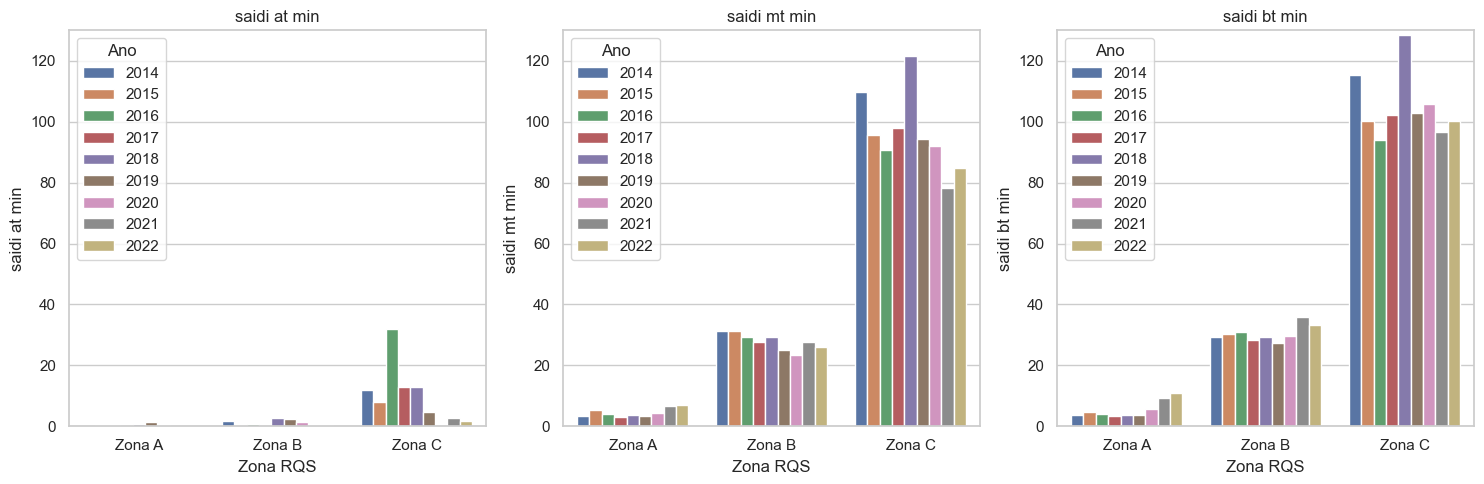

In [10]:
# Variáveis que você deseja incluir no gráfico
variaveis = ['saidi at min', 'saidi mt min', 'saidi bt min']

# Crie o gráfico
plt.figure(figsize=(15, 5))

# Loop para adicionar as barras para cada variável
for i, variavel in enumerate(variaveis):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=grupo_zona, x='zona rqs', y=variavel, hue='ANO')
    plt.title(variavel)
    plt.xlabel('Zona RQS')
    plt.ylabel(variavel)
    plt.legend(title='Ano', loc='upper left')
    plt.ylim(0, 130)

# Ajuste de layout
plt.tight_layout()
plt.savefig(output_folder /'SAIDI.svg')
plt.show()


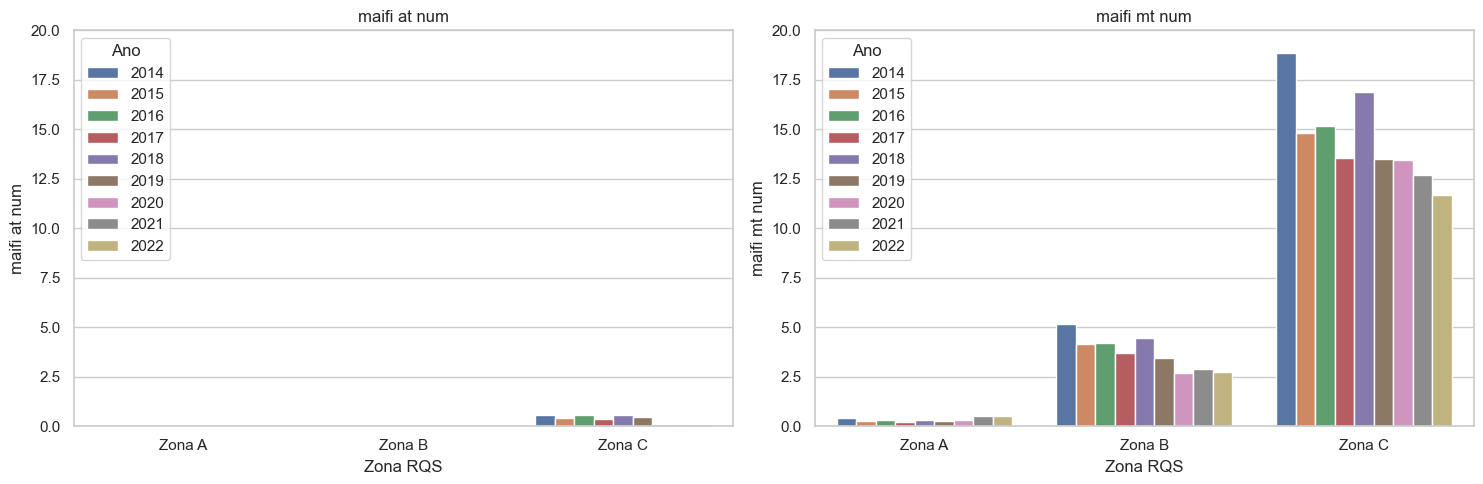

In [11]:
# Variáveis que você deseja incluir no gráfico
variaveis = ['maifi at num', 'maifi mt num']

# Crie o gráfico
plt.figure(figsize=(15, 5))

# Loop para adicionar as barras para cada variável
for i, variavel in enumerate(variaveis):
    plt.subplot(1, 2, i+1)
    sns.barplot(data=grupo_zona, x='zona rqs', y=variavel, hue='ANO')
    plt.title(variavel)
    plt.xlabel('Zona RQS')
    plt.ylabel(variavel)
    plt.legend(title='Ano', loc='upper left')
    plt.ylim(0, 20)

# Ajuste de layout
plt.tight_layout()
plt.savefig(output_folder /'MAIFI.svg')
plt.show()


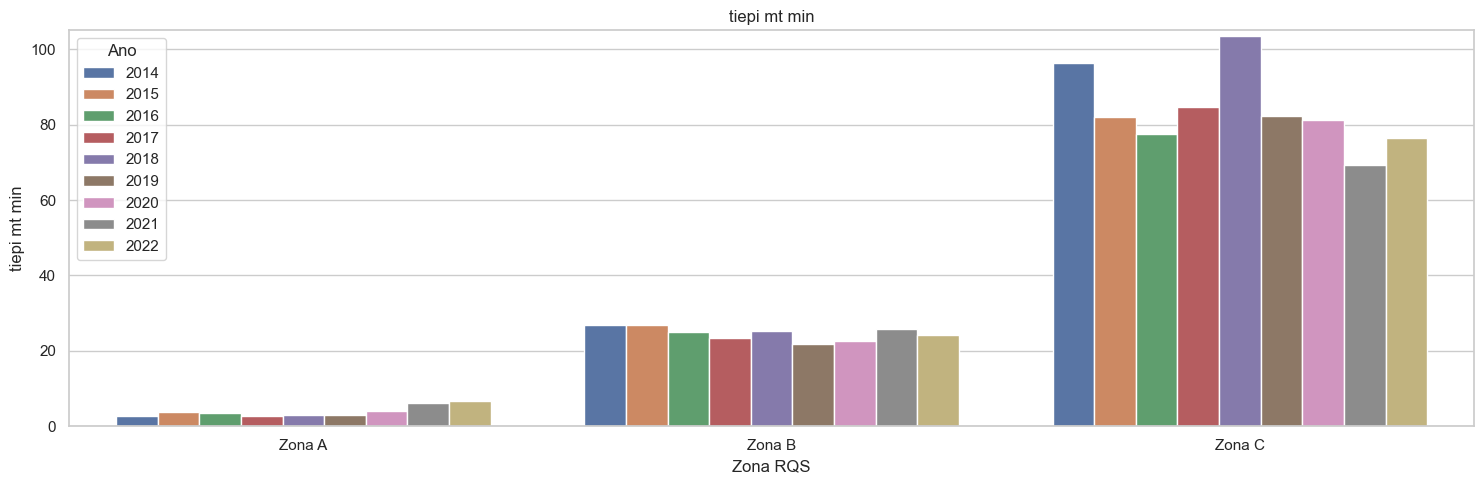

In [12]:
# Variáveis que você deseja incluir no gráfico
variaveis = ['tiepi mt min']

# Crie o gráfico
plt.figure(figsize=(15, 5))

# Loop para adicionar as barras para cada variável
for i, variavel in enumerate(variaveis):
    plt.subplot(1, 1, i+1)
    sns.barplot(data=grupo_zona, x='zona rqs', y=variavel, hue='ANO')
    plt.title(variavel)
    plt.xlabel('Zona RQS')
    plt.ylabel(variavel)
    plt.legend(title='Ano', loc='upper left')
    plt.ylim(0, 105)

# Ajuste de layout
plt.tight_layout()
plt.savefig(output_folder /'TIEPI.svg')
plt.show()


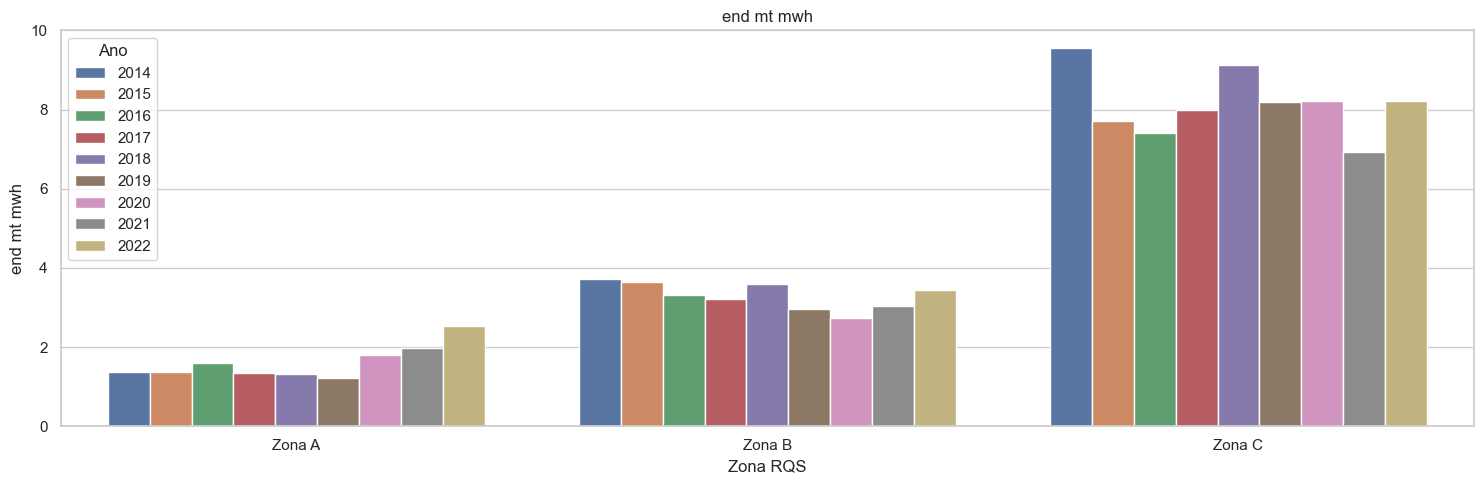

In [13]:
# Variáveis que você deseja incluir no gráfico
variaveis = ['end mt mwh']

# Crie o gráfico
plt.figure(figsize=(15, 5))

# Loop para adicionar as barras para cada variável
for i, variavel in enumerate(variaveis):
    plt.subplot(1, 1, i+1)
    sns.barplot(data=grupo_zona, x='zona rqs', y=variavel, hue='ANO')
    plt.title(variavel)
    plt.xlabel('Zona RQS')
    plt.ylabel(variavel)
    plt.legend(title='Ano', loc='upper left')
    plt.ylim(0, 10)

# Ajuste de layout
plt.tight_layout()
plt.savefig(output_folder /'END.svg')
plt.show()


### Evolução Duração Média das Interrupções Longas do Sistema

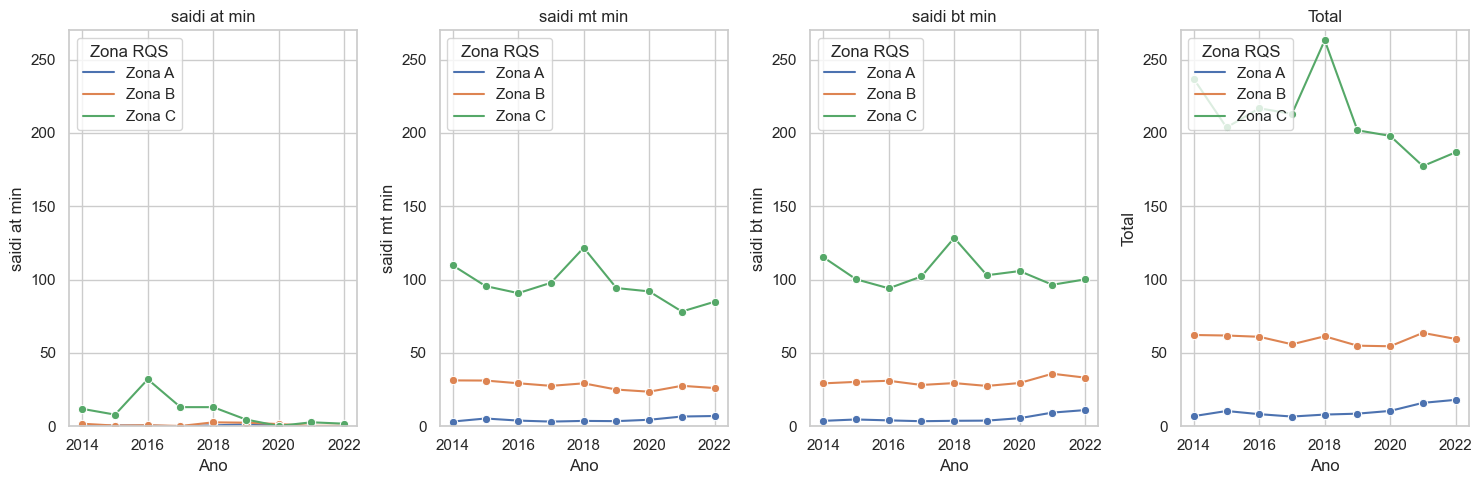

In [14]:
variaveis = ['saidi at min', 'saidi mt min', 'saidi bt min']

# Criando uma nova coluna para o total
grupo_zona['Total'] = grupo_zona[variaveis].sum(axis=1)

# Criando o gráfico de linhas
plt.figure(figsize=(15, 5))

# Loop para adicionar as linhas para cada variável
for i, variavel in enumerate(variaveis + ['Total']):
    plt.subplot(1, 4, i+1)
    sns.lineplot(data=grupo_zona, x='ANO', y=variavel, hue='zona rqs', marker='o')
    plt.title(variavel)
    plt.xlabel('Ano')
    plt.ylabel(variavel)
    plt.legend(title='Zona RQS', loc='upper left')
    plt.ylim(0, 270)

# Ajuste de layout
plt.tight_layout()
plt.show()


In [15]:
tabela_soma = grupo_zona.groupby('ANO')[variaveis + ['Total']].sum().reset_index()
tabela_soma

,ANO,saidi at min,saidi mt min,saidi bt min,Total
0,2014,13.596116,144.169204,148.201972,305.967292
1,2015,8.867998,132.045074,135.123820,276.036892
2,2016,33.075053,123.943341,129.074406,286.092801
3,2017,13.213644,128.590975,133.752650,275.557269
4,2018,16.282139,154.637845,161.599200,332.519185
5,2019,8.302638,122.740248,134.310478,265.353364
6,2020,2.249704,119.945901,140.830525,263.026129
7,2021,2.966779,112.453882,141.617426,257.038087
8,2022,2.100949,117.943197,144.321231,264.365377


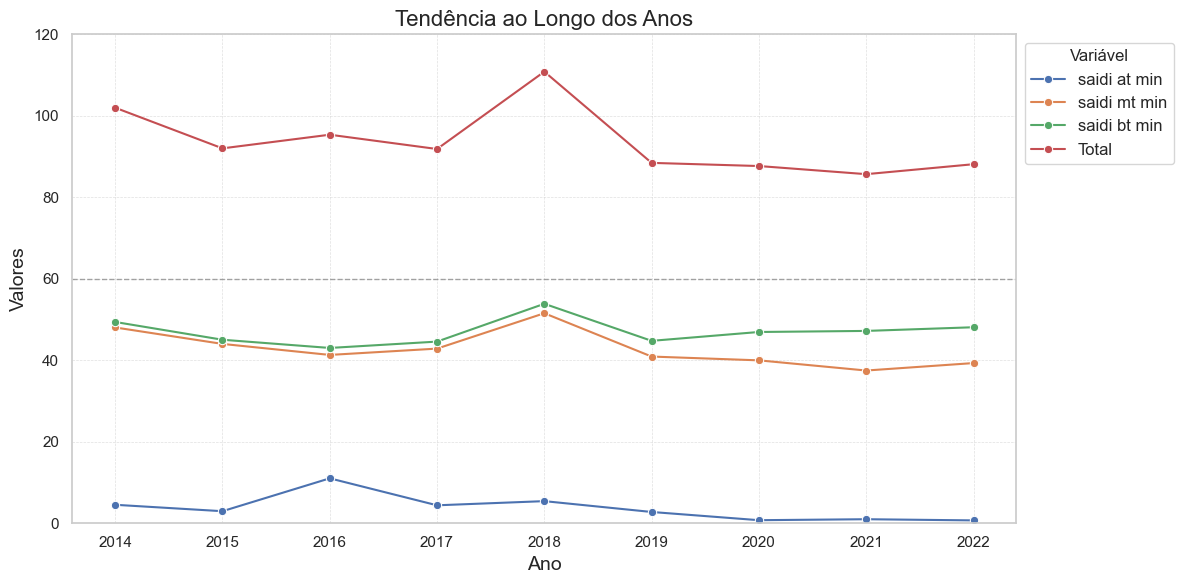

In [16]:
# Variáveis que você deseja incluir no gráfico
variaveis = ['saidi at min', 'saidi mt min', 'saidi bt min']

# Criando o gráfico de linhas
plt.figure(figsize=(12, 6))

# Loop para adicionar as linhas para cada variável
for variavel in variaveis + ['Total']:
    sns.lineplot(data=grupo_zona, x='ANO', y=variavel, marker='o', label=variavel, dashes=True, errorbar=None)

# Ajuste de layout
plt.title('Tendência ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend(title='Variável', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.ylim(0, 120)

# Adicionando grade horizontal para facilitar a leitura
plt.axhline(y=60, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Adicionando grade de fundo sutil
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.7)

# Tornando a imagem mais "amigável" ao salvar
plt.tight_layout()

# Salvando a imagem com um tamanho razoável
# plt.savefig(output_folder / 'SAIDI_lines.png', dpi=300)
plt.show()


In [17]:
grupo_zona

,ANO,zona rqs,saifi at num,saidi at min,maifi at num,tiepi mt min,end mt mwh,saifi mt num,saidi mt min,maifi mt num,saifi bt num,saidi bt min,Total
1,2014,Zona A,0.003597,0.021583,0.014388,2.805995,1.361952,0.094516,3.219612,0.396439,0.096221,3.676328,6.917523
2,2014,Zona B,0.014388,1.719544,0.065048,26.732651,3.715854,0.773005,31.268806,5.174728,0.732961,29.246833,62.235183
3,2014,Zona C,0.124760,11.854989,0.562890,96.264833,9.542070,2.234061,109.680786,18.850633,2.285546,115.278811,236.814586
5,2015,Zona A,0.003597,0.495385,0.003597,3.889203,1.373978,0.091474,5.284403,0.288985,0.101702,4.621177,10.400965
6,2015,Zona B,0.007194,0.449041,0.035671,26.951217,3.632782,0.739273,31.163022,4.172542,0.740151,30.264442,61.876504
7,2015,Zona C,0.091427,7.923572,0.414329,81.955605,7.719334,2.074324,95.597649,14.838707,2.190470,100.238201,203.759422
9,2016,Zona A,0.003597,0.373680,0.021583,3.391425,1.595101,0.117180,3.862839,0.327883,0.114207,4.002946,8.239464
10,2016,Zona B,0.011990,0.692387,0.071942,25.051461,3.310889,0.736553,29.311117,4.200757,0.746149,31.008035,61.011539
11,2016,Zona C,0.084053,32.008986,0.580456,77.642079,7.400919,2.142285,90.769386,15.176865,2.197497,94.063426,216.841798
13,2017,Zona A,0.000000,0.000000,0.000000,2.745809,1.344731,0.093407,3.179603,0.238665,0.096770,3.434481,6.614083


### Mapa das zonas

In [18]:
zonas = quebras.loc[:,["Concelho", "zona rqs"]]
zonas.drop_duplicates()
zonasRemove = zonas.loc[zonas["zona rqs"]=="Concelho"]
zonas = zonas.drop(zonasRemove.index)
zonas

,Concelho,zona rqs
2,Santiago do Cacém,Zona C
4,Albufeira,Zona C
5,Lagos,Zona B
8,Lagos,Zona C
10,Olhão,Zona B
...,...,...
10003,Faro,Zona C
10004,Ílhavo,Zona B
10005,Sertã,Zona A
10006,Salvaterra de Magos,Zona C


In [19]:
file_path = shape_folder / "concelhos.shp"
Concelho = gpd.read_file(file_path)
Concelho

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,182,PRT,Portugal,20,Viseu,302,Tarouca,PT.VI.TR,0,1820,Concelho,Municipality,None,None,"POLYGON ((-7.72591 41.08079, -7.72442 41.08028..."
304,182,PRT,Portugal,20,Viseu,303,Tondela,PT.VI.TO,0,1821,Concelho,Municipality,None,None,"POLYGON ((-8.12772 40.64028, -8.12751 40.64027..."
305,182,PRT,Portugal,20,Viseu,304,Vila Nova de Paiva,PT.VI.VP,0,1822,Concelho,Municipality,None,None,"POLYGON ((-7.77933 40.93439, -7.77835 40.93436..."
306,182,PRT,Portugal,20,Viseu,305,Viseu,PT.VI.VS,0,1823,Concelho,Municipality,None,None,"POLYGON ((-7.80686 40.83789, -7.80653 40.83787..."
